In [1]:
import numpy as np, pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from WISE_tools import *
from astropy.stats import LombScargle

%matplotlib inline

In [2]:
unique_names = parse_source_names('test_data/')

J215803.09+485330.7


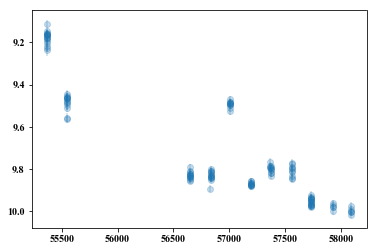

In [3]:
#Try accessing and concatenating lightcurves
for name in unique_names[1:]:
    print(name)
    
    df = get_lightcurve(name, 'test_data/')
    
    plt.errorbar(df['mjd'], df['w1mpro'], yerr=df['w1sigmpro'],
                 marker='o', linestyle='none', alpha=0.25)
plt.gca().invert_yaxis()

In [14]:
mjds = []
W1s = []
W1errs = []
for name in unique_names:
    df = get_lightcurve(name, 'test_data/')
    mjd,W1,W1err = df['mjd'].values, df['w1mpro'].values, df['w1sigmpro'].values
    mjds.append(mjd)
    W1s.append(W1)
    W1errs.append(W1err)

In [ ]:
W1_f, W1_p = LombScargle(mjd, W1, W1err).autopower()

In [ ]:
plt.plot(1/W1_f, W1_p)
plt.xscale('log')

In [18]:
from astroML.time_series import ACF_scargle, ACF_EK

/Users/carina/anaconda/lib/python3.5/site-packages/astroML/time_series/ACF.py:133: RuntimeWarning: invalid value encountered in true_divide
  ACF /= M
/Users/carina/anaconda/lib/python3.5/site-packages/astroML/time_series/ACF.py:135: RuntimeWarning: divide by zero encountered in true_divide
  return ACF, np.sqrt(2. / M), bins


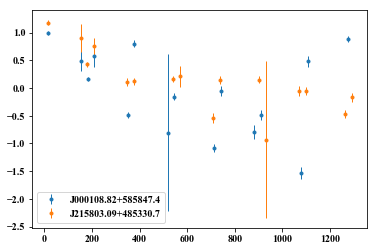

In [24]:
for mjd,W1,W1err,name in zip(mjds,W1s,W1errs,unique_names):
    C_EK, C_EK_err, bins = ACF_EK(mjd, W1, W1err, bins=np.linspace(0, (max(mjd)-min(mjd))/2, 50))
    t_EK = 0.5 * (bins[1:] + bins[:-1])

    plt.errorbar(t_EK, C_EK, C_EK_err, fmt = '.', lw=1,
                label=name)
    plt.legend(loc=3)